<a href="https://colab.research.google.com/github/SumanKumar0176/21mayass1/blob/main/Implementation_of_ANN_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [3]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.12.0
Keras Version 2.12.0


In [5]:
os.getcwd()

'/content'

CPU/CPU Check


In [6]:
tf.config.list_physical_devices("GPU")



[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [8]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU is available!
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


creating a simple classifier using keras on MNIST data

In [9]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [11]:
X_train_full.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [14]:
len(X_test[1][0])

28

In [15]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.


In [16]:
#TRAIN=55000
#TEST=10000
#VAl=5000

In [17]:
len(X_train_full[5000:] )

55000

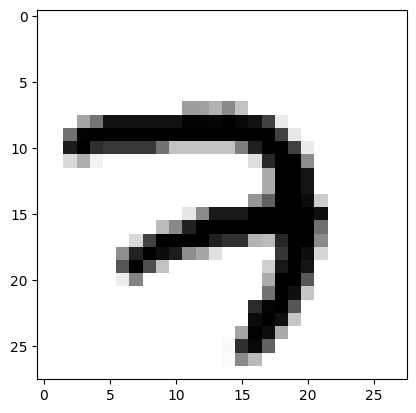

In [18]:
# Lets view some data 
plt.imshow(X_train[0], cmap="binary")
plt.show()

<Axes: >

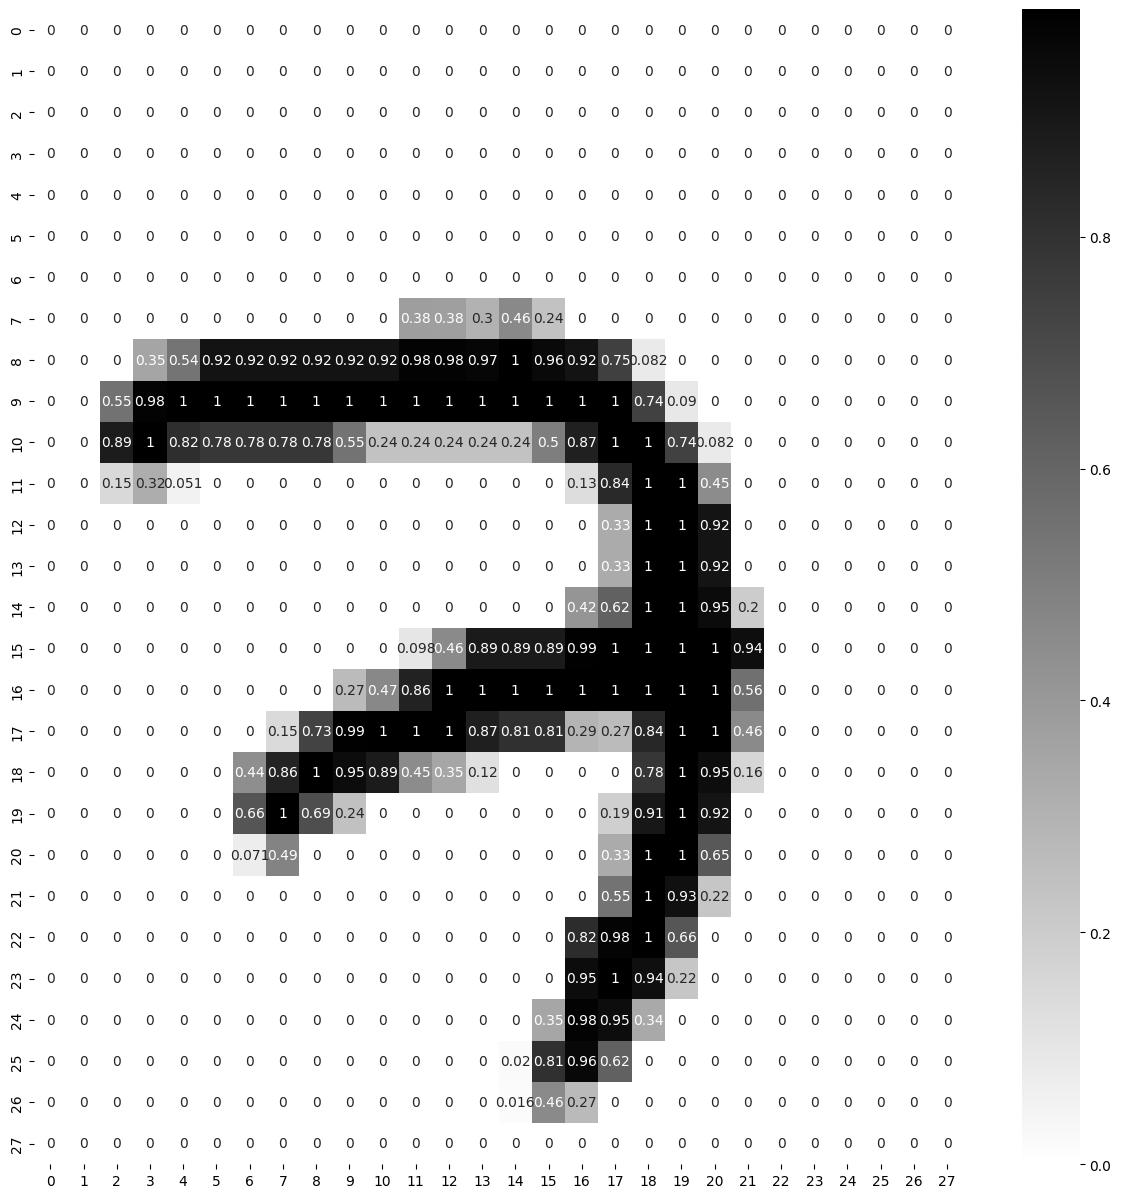

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [20]:
28*28

784

In [21]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [22]:
model_clf.layers

In [23]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Method-2

In [25]:
# from keras.models import Sequential 
# from keras.layers import Dense, Flatten

# #define the model 
# model=Sequential()
# model.add(Dense(units=64,activation='relu',input_dim=100))
# model.add(Dense(units=64,activation='softmax'))


In [26]:
# first Layer * second Layer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [27]:
# Total parameters to be trained 
sum((235500, 30100, 1010))

266610

In [28]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [29]:
len(hidden1.get_weights()[1])

300

In [32]:
len(hidden1.get_weights()[0])

784

In [33]:
hidden1.get_weights()

[array([[-0.01389763,  0.0410196 ,  0.03148668, ..., -0.04439689,
          0.03721673, -0.0434488 ],
        [-0.00061912, -0.01005192, -0.00180656, ..., -0.03034053,
         -0.03033386,  0.03797093],
        [-0.0255642 ,  0.03195952, -0.03597027, ..., -0.04447598,
         -0.07396543,  0.03478906],
        ...,
        [-0.02266387,  0.02446162, -0.03982455, ..., -0.04487232,
          0.00423793, -0.05090853],
        [-0.02570815, -0.02835282, -0.07046444, ..., -0.06739566,
          0.01651392, -0.05492688],
        [-0.00523897,  0.03418078,  0.03474899, ...,  0.06395289,
          0.00485084,  0.02706956]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [34]:
weights, biases = hidden1.get_weights()

In [35]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[-0.01389763,  0.0410196 ,  0.03148668, ..., -0.04439689,
         0.03721673, -0.0434488 ],
       [-0.00061912, -0.01005192, -0.00180656, ..., -0.03034053,
        -0.03033386,  0.03797093],
       [-0.0255642 ,  0.03195952, -0.03597027, ..., -0.04447598,
        -0.07396543,  0.03478906],
       ...,
       [-0.02266387,  0.02446162, -0.03982455, ..., -0.04487232,
         0.00423793, -0.05090853],
       [-0.02570815, -0.02835282, -0.07046444, ..., -0.06739566,
         0.01651392, -0.05492688],
       [-0.00523897,  0.03418078,  0.03474899, ...,  0.06395289,
         0.00485084,  0.02706956]], dtype=float32)

In [36]:
print("shape\n", biases.shape)

shape
 (300,)


Model compilation

In [38]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


Model fitting

In [39]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/30
1719/1719 [==============================] - 12s 4ms/step - loss: 0.5989 - accuracy: 0.8454 - val_loss: 0.3206 - val_accuracy: 0.9108
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2951 - accuracy: 0.9157 - val_loss: 0.2470 - val_accuracy: 0.9308
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2420 - accuracy: 0.9313 - val_loss: 0.2120 - val_accuracy: 0.9390
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2080 - accuracy: 0.9414 - val_loss: 0.1807 - val_accuracy: 0.9492
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1822 - accuracy: 0.9483 - val_loss: 0.1648 - val_accuracy: 0.9526
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1613 - accuracy: 0.9548 - val_loss: 0.1515 - val_accuracy: 0.9606
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1446 - accuracy: 0.9588 - val_loss: 0.1372 - val_accuracy

In [40]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [41]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.598947,0.845418,0.320589,0.9108
1,0.295137,0.915727,0.247012,0.9308
2,0.242038,0.931327,0.211995,0.9390
3,0.207993,0.941382,0.180746,0.9492
4,0.182169,0.948345,0.164776,0.9526
5,0.161328,0.954782,0.151496,0.9606
6,0.144603,0.958764,0.137210,0.9638
7,0.130511,0.963364,0.128834,0.9656
8,0.118794,0.967327,0.117506,0.9670
9,0.108513,0.970527,0.110579,0.9716


<Axes: >

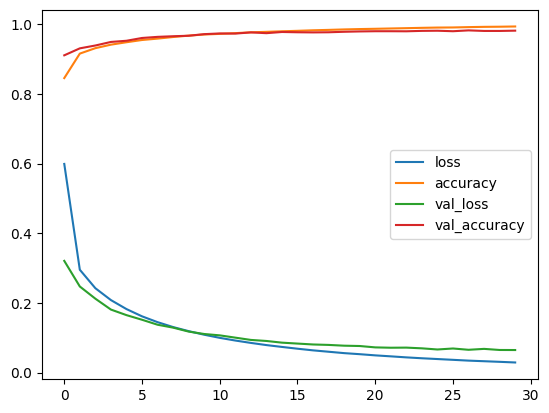

In [42]:
pd.DataFrame(history.history).plot()

In [43]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0695 - accuracy: 0.9786


[0.06954610347747803, 0.978600025177002]

SAMPLE CHECK TEST DATA

In [45]:
x_new = X_test[:3]
# x_new

In [46]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

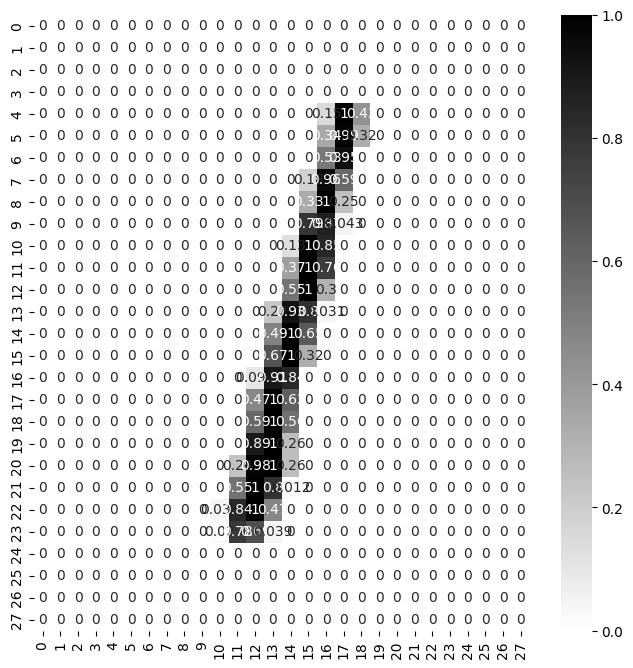

In [48]:
plt.figure(figsize=(8,8))
sns.heatmap(X_test[2],annot=True,cmap='binary')

<Axes: >

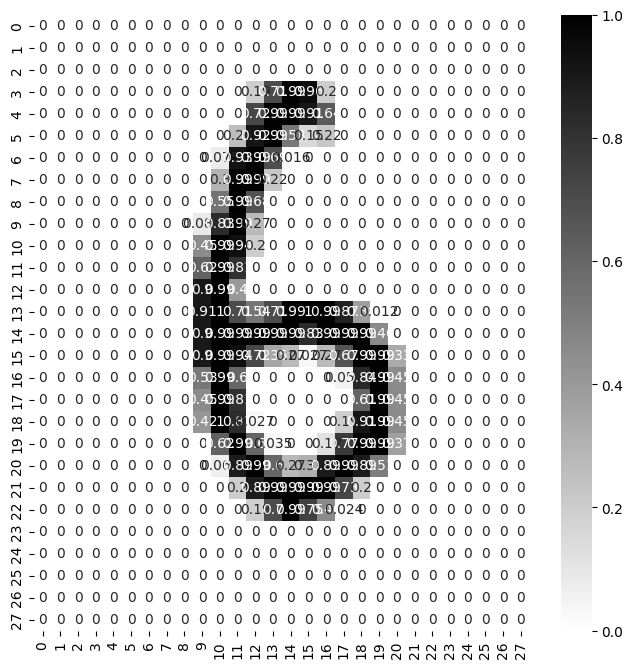

In [49]:
plt.figure(figsize=(8,8))
sns.heatmap(X_test[21],annot=True,cmap='binary')

<Axes: >

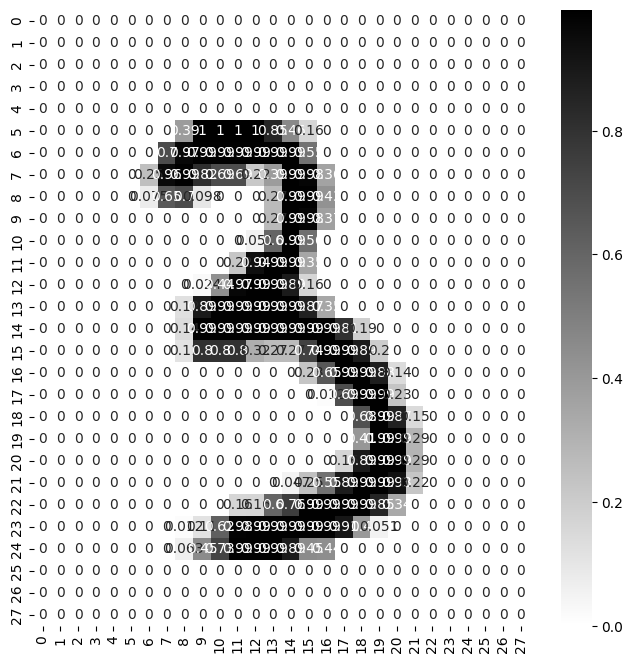

In [50]:
plt.figure(figsize=(8,8))
sns.heatmap(X_test[32],annot=True,cmap='binary')

In [51]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 80ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.994, 0.001, 0.   , 0.   , 0.   , 0.   , 0.001, 0.003,
        0.   ]], dtype=float32)

In [52]:
y_prob

array([[7.4362407e-07, 6.5379375e-08, 6.6953558e-06, 1.7368395e-04,
        1.9147276e-08, 2.2528486e-07, 9.4691061e-12, 9.9981445e-01,
        1.3162404e-06, 2.8477900e-06],
       [6.8836885e-06, 1.4508655e-04, 9.9960953e-01, 1.9306492e-04,
        1.6925144e-11, 1.2799203e-06, 1.1251344e-05, 7.7380799e-13,
        3.2997465e-05, 5.3265781e-11],
       [5.5182268e-06, 9.9413812e-01, 1.1771268e-03, 8.9409004e-05,
        1.3817767e-04, 1.0288637e-04, 2.9763833e-04, 1.2278080e-03,
        2.8125651e-03, 1.0769485e-05]], dtype=float32)

In [53]:
y_pred = np.argmax(y_prob, axis = -1)

In [54]:
y_pred

array([7, 2, 1])

In [55]:
actual

array([7, 2, 1], dtype=uint8)

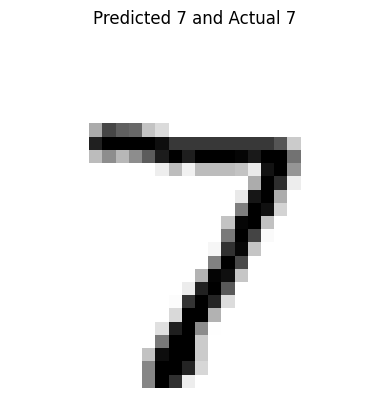

######################


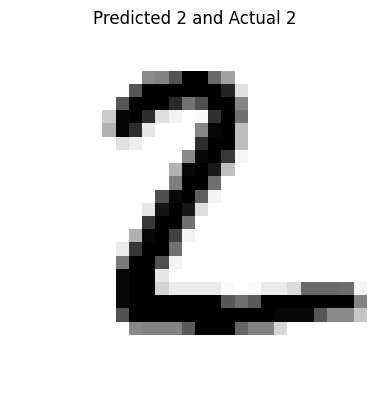

######################


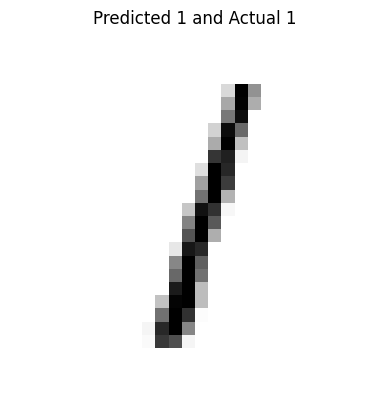

######################


In [56]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show() 
  print("######################")